This notebook loads the _Randoms_ data set, uses Pandas to group the records into quantiles and then uses _Matplotlib_ to generate complex charts.

In [1]:
from Randoms_2 import load_randoms
import matplotlib.pyplot as plt
import pandas

Load data set in _randoms_map_. The map associates each random value (key) with the list of zero-based iterations (value) where the value was generated. Next, create a _randoms_dataFrame_ which is basically a table where each row has two columns:
- _quantile_: a number 0 .. 9, standing for one of the ten sub-intervals of the iterations range.
- _value_: the random value that was generated at an iteration within the associated quantile.

Think of _randoms_dataFrame_ as a database table. Pandas allow us to do SQL-like operations on this table.

In [ ]:
randoms_map, count = load_randoms("randoms_db.txt")
print(f"Loaded {len(randoms_map.keys())} unique random generated in a sequence of {count} iterations")
rows = []
for random_value, indexes in randoms_map.items():
    for index in indexes:
        quantile = int(index / 10)
        rows.append({"quantile": quantile, "value": random_value})
randoms_dataFrame = pandas.DataFrame(rows)
print(randoms_dataFrame)

Group all rows of <i>randoms_dataFrame</i> by the _quantile_ column. Then create two aggregates:
- _quantile_stats_ aggregate all values in each group to generate _min_, _max_, _median_, _mean_ and _std values for the group.
- _quantile_values_ aggregates in a list all the values in a quantile.

In [8]:
quantile_groups = randoms_dataFrame.groupby("quantile")
quantile_stats = quantile_groups["value"].agg(["min", "max", "median", "mean", "std"]).reset_index()
quantile_values = quantile_groups["value"].apply(list)
print(quantile_values)

quantile
0    [49, 49, 41, 29, 29, 65, 24, 58, 36, 32]
1    [49, 29, 32, 55, 17, 18, 26, 45, 28, 62]
2    [49, 29, 24, 45, 48, 48, 48, 21, 37, 22]
3    [55, 45, 40, 34, 50, 63, 63, 20, 51, 64]
4    [24, 28, 48, 21, 63, 30, 42, 46, 46, 52]
5    [65, 24, 58, 28, 42, 15, 61, 31, 16, 27]
6    [24, 32, 55, 55, 34, 64, 27, 47, 38, 43]
7    [32, 32, 26, 45, 37, 31, 16, 38, 38, 60]
8    [29, 45, 48, 21, 46, 61, 47, 38, 44, 56]
9    [41, 24, 58, 37, 42, 15, 61, 31, 56, 54]
Name: value, dtype: object


Create a composed chart using the _quantile_stats_ DataFrameGroup, showing two things for each _quantile_ value:
- a plot chart showing the random values _mean_ within the _quantile_
- a bar chart showing the random values _standard_deviation_ within the _quantile.

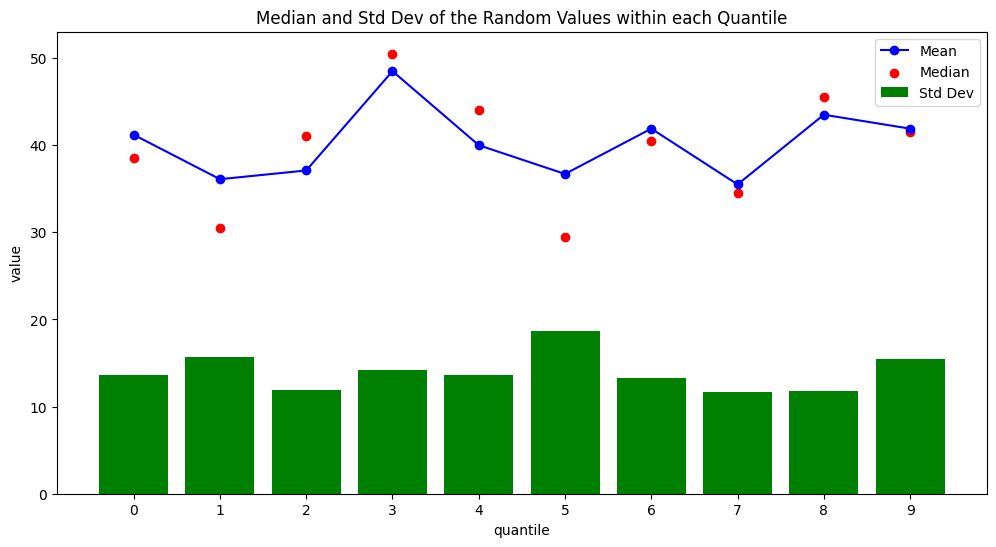

In [11]:
plt.figure(figsize=(12, 6))
plt.title("Median and Std Dev of the Random Values within each Quantile")
plt.xlabel("quantile")
plt.ylabel("value")
plt.xticks(range(len(quantile_stats)), quantile_stats["quantile"])
plt.plot(quantile_stats["quantile"], quantile_stats["mean"], label="Mean", color="blue", marker="o")
plt.bar(quantile_stats["quantile"], quantile_stats["std"], label="Std Dev", color="green")
plt.scatter(quantile_stats["quantile"], quantile_stats["median"], label="Median", color="red")  
plt.legend()
plt.show()

Create a composed chart from both _quantile_values_ and _quantile_stats_ groups, showing a few charts:
- three plot charts showing the _max_, _median_ and _min_ values of all the randoms within that _quantile_.
- one boxplot (whiskers) chart showing the dimensions of the four quartiles within the quantile.


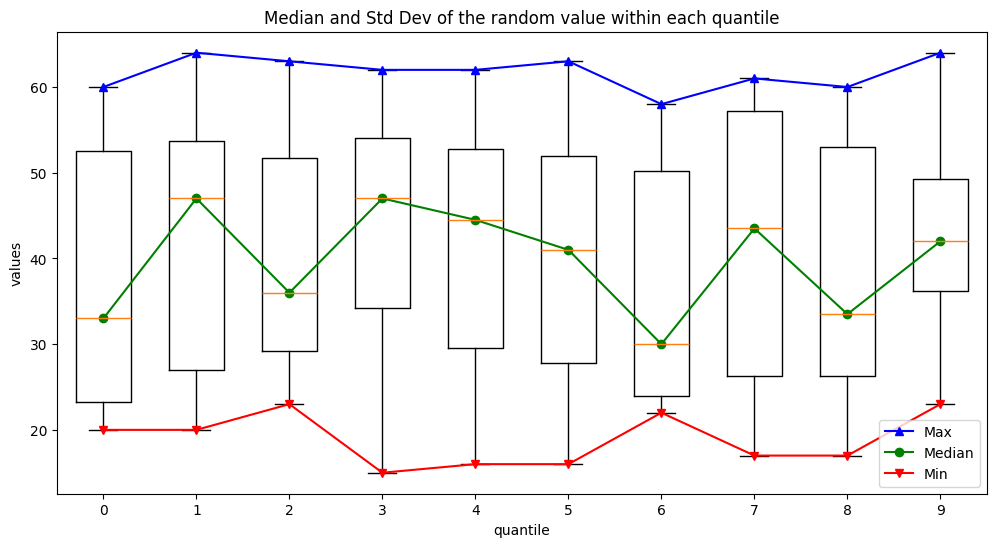

In [6]:
plt.figure(figsize=(12, 6))
plt.title("Median and Std Dev of the random value within each quantile")
plt.xlabel("quantile")
plt.ylabel("values")
plt.boxplot(quantile_values.tolist(), positions=range(len(quantile_values)), widths=0.6, whis=[0, 100])
plt.xticks(range(len(quantile_values)), quantile_values.index.tolist())
plt.plot(quantile_stats["quantile"], quantile_stats["max"], label="Max", color="blue", marker="^")
plt.plot(quantile_stats["quantile"], quantile_stats["median"], label="Median", color="green", marker="o")
plt.plot(quantile_stats["quantile"], quantile_stats["min"], label="Min", color="red", marker="v")
plt.legend()
plt.show()